# Reinforcement Learning

## Naman Manocha

# Overview

This workbook is about the another interesting field of machine learning which is **Reinforcement Learning** which resembles the human form of learning and based on reward funtion. When the series of actions end up with good results, we can **reinforce** those actions by giving some rewards. In this workbook, we will be implementing and learning reinforcement learning with Card game named **Black Jack**.  
We wil follow Temporal Difference learning approach for our implementation because this approach consider that the agent knows only partial information of the MDP. Basically, there are two algorithms SARSA and Q-learning for the implementaion whcih we will discuss later in our workbook which one to choose. 

## Blackjack

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

# Description of Blackjack Problem

Blackjack is a card game where the goal is to obtain cards that sum to as near as possible to 21 without going over. They're playing against a fixed dealer.

Face cards (Jack, Queen, King) have point value 10. Aces can either count as 11 or 1, and it's called 'usable' at 11. This game is placed with an infinite deck (or with replacement).

The game starts with each player getting two face up cards and dealer having one face up and face down card and the player needs to bet an amount of money within range of 1 to max bet (10). Note: Face up means that you will know what the card is.

The player can request additional cards (hit=1) until they decide to stop (stick=0) or exceed 21 (bust).

After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater (fixed policy). If the dealer goes bust the player wins. You won't see the dealer's facedown card, just you will know if you have or lost and you will get appropriate reward of +1 if you win, -1 if you loose or 0 if the match is drawn. (It is freedom of choice for you to change the reward function. If you want to change, you should explain the reason of the change.)

If the player wins, the amount he has bet will be doubled and given back. If the player and dealer have the same sum, then its a draw and the player will get back the money he has bet. If the player loses then, the money he bet will be lost. If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21. You are free to change the reward function to make it learn more efficiently. (i.e., the amount of money the user is winning after each round).

Regardless of the number of players on the table, each player will be just playing against the dealer independently of the other players. 

# Methods

## Review of the SARSA and Q-Learning
When the number of states increases, the memory problem comes into picture. **Temporal Difference** helps us handle these problems. TD learning checks that agent learns only partial information of MDP. It keep track of the only of the current and next state and it let the agent explore the enviroment randomly, with the value function:

$$ V(s_t) = R_{t+1} + \gamma V(s_{t+1})$$

So, temoral difference Error:
$$ \delta_t= R_{t+1} + \gamma V(s_{t+1}) - V(s_t)$$

This error can be further be used to estimate the gradient to update the value estimation:
$$ 
\delta_t \leftarrow R_{t+1} + \alpha \delta_t 
$$

We define Q function to evaluate state and action together. So we follow two different algorithms for updating the Q-table:    
**1. SARSA** (on-policy control)  

In **SARSA**, we use the action that is taken in previous state.
First we update Q with certain assumption and follow a certain behavior policy. This, it is called on-policy control. Given below is the formula used to update Q in SARSA

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

**2. Q-learning** (off-policy control)

In **Q-learning** algorithm, if we start at state 1, perform some action and get some reward, and then look what is the maximum reward for an action is in state 2, and uses it to update action value of performing the action 1 in the state 1.

In Q-learning, we do not make any king of assumption in behavior policy and explore other possiblle policies to update the table. Thus this is called as off-policy control. Given below is the formula used to update Q in Q-learning

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

The primary difference in Q-learning is that it uses the action with maximum reward to update the action value.

Below are the psedocodes for each algorithm. 

**[Algorithm: SARSA]**
![](http://incompleteideas.net/book/ebook/pseudotmp8.png)


**[Algorithm: Q-learning]**
![](http://incompleteideas.net/book/ebook/pseudotmp9.png)


## Choice of TD learning and Reason

There is not much difference between the two learning algorithms i.e SARSA and Q-learning. The only difference between the two is that Q-learning simply select one with maximum Q value, a kind of Greedy approach. We will follow Q-learning approach for our problem in order to maximizing the reward. Since we have only 2 possible actions for our problem so there would not be any computational problem.  
Although there is a little problem with even this approach is that greedy selection will repeat the same actionsor we can say that it repeatedly exploit our current knowledge.  


This is called **Exploration-Exploitation** problem.  
1. Exploration: This approach is abot exploring number of states and actions in the environment.
2. Exploitation: While on the other hand this approach is continiously selecting our actions to greddily to maximize the rewards.

We have to amintain a tradeoff between the two and we select our action based on $\epsilon$-greedy action selection. we can conytrol these parameters between $\epsilon \in [0,1]$. $\epsilon$=0 means the action is selected in greedy manner while $\epsilon$=1 means action is selected randomly.   
We will maintain a kind of tradeoff between these 2.


## Choice of Function Approximation and Reason



Q-learning can be combined with function approximation. This makes it possible to apply the algorithm to larger problems, even when the state space is continuous. Here are the two famous action-value function approximation functions:

* Linear Value
* Neural Network

I have chosen *Linear Value Function approximation* as it is a differentiable function approximator and converges to global optimum.  It lets us assign values to states s, which can then be used to determine optimal policies. The performance of Value Iteration with function approximation is going to depend almost entirely on the quality of the features (along with the function representation, i.e. linear, neural network, etc.)

For state transition from $i$ to $j$ with action $k$
$$ V^{n+1} (s_i) = \max_k \Big[ R_i + \gamma \sum_{j=1}^N P^k_{ij} V^n (s_j) \Big] $$

With an estiate of the value function $V(s)$, $\hat{V}(s)$, 

   $$ 
        \begin{align}
        \Rightarrow \quad \delta_t &= R_{t+1} + \gamma \hat{V}(s_{t+1}) - V(s_t).
        \end{align}
    $$
    
We can use this error as a gradient to update the value estimation.

$$
    \begin{align}
        V(s_t) &\leftarrow R_{t+1} + \alpha (R_{t+1} + \gamma \hat{V}(s_{t+1}) - V(s_t))
    \end{align}
$$

Without making assumption of behavior policy, we can explore other possible policies to update the Q.

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

Picking an action can be simple by selecting one with maximum Q value, so Greedy!. 

$$
a^* = \arg \max_a Q(S_t, a)
$$

## Implementation of the Approach

### Creating the player

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np

ModuleNotFoundError: No module named 'gym'

In [55]:
class Player():
    """
        
        Player class to create a player object.
        eg: player = Player("player1", start_balance = 10)
        Above declaration will be for your agent.
        All the player names should be unique or else you will get error.
        
    """
    def __init__(self, player_name, start_balance = 10):
        self.player_name = player_name
        self.card = []
        self.starter_balance = start_balance
        self.total_balance = start_balance

    def recharge_account(self):
        self.total_balance = self.starter_balance
        
    def get_info(self):
        print("Player name: {}".format(self.player_name))
        print("Player card: {}".format(self.card))
        print("Player total_balance: {}".format(self.total_balance))     

### Utilities function

In [56]:
def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]

### Creating the Black Jack Environment

In [57]:

class BlackjackEnv(gym.Env):
    """
    Simple blackjack environment
    
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with each (player and dealer) having one face up and one
    face down card.
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation is: the players current sum, players current card, players balance left, 
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    
    Parameters
    ==========
    natural      boolean
                 option for 50% more reward on natural blackjack 
    
    """
    
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()
        self.total_players = 1
        self.players = {}
        self.natural = natural
        self.dealer = []
        self.round_bet_info = {}
        self.max_bet_cap = 10

    def add_player(self, player_class):
        if player_class not in self.players and len(self.players) < self.total_players:
            self.players[player_class.player_name] = player_class
        else:
            raise Exception("Maximum number of player allowed: {}. You can increase the player count while initializing the environment".format(len(self.players)))

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, player_name, action):
        assert self.action_space.contains(action)
        if action:  # hit: add a card to players hand and return
            self.players[player_name].card.append(draw_card(self.np_random))
            if is_bust(self.players[player_name].card):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.players[player_name].card), score(self.dealer))
            if self.natural and is_natural(self.players[player_name].card) and reward == 1:
                reward = 1.5
        if done:
            self.settle_balance(int(reward), player_name)
        return {'state':self._get_obs(player_name), 'reward': reward, 'is_round_done': done}

    def _get_obs(self, player_name):
        return {'player_info':self.get_player_obs(player_name), 
                'dealer_info': self.dealer[0]}

    def get_player_obs(self, player_name):
        return {'player_sum_card':sum_hand(self.players[player_name].card), 
                'player_card':self.players[player_name].card, 
                'player_total_balance':self.players[player_name].total_balance, 
                'usable_ace' : usable_ace(self.players[player_name].card)}
    
    def get_valid_bet_amount(self, player_name):
        #print("player name: {} money left: {}".format(player_name, self.players[player_name].total_balance))
        if self.players[player_name].total_balance < 1:
            return {'is_round_done': True, 'valid_bet_amount': -1}
        max_bet_upper_limit = self.players[player_name].total_balance
        if self.players[player_name].total_balance >= self.max_bet_cap:
            max_bet_upper_limit = self.max_bet_cap            
        return {'is_round_done': False, 'valid_bet_amount': list(range(1, max_bet_upper_limit+1))}
            
    def init_round(self, player_name):         
        self.dealer = draw_hand(self.np_random)
        self.players[player_name].card = draw_hand(self.np_random)
        return {'state': self._get_obs(player_name)}        

    def bet_money(self, player_name, bet_amount):
        self.players[player_name].total_balance -= bet_amount
        self.round_bet_info[player_name] = bet_amount
            
    def settle_balance(self, is_winner, player_name):
        if is_winner == 1:
            #print("player winner")
            self.players[player_name].total_balance += (2 * self.round_bet_info[player_name])
        elif is_winner == 0:
            #print("Draw match")
            self.players[player_name].total_balance += self.round_bet_info[player_name]
        #else:
            #print("player loser, wont get back the money, try next round")
    
    def reset(self, natural=False):
        for player_name, player_class in self.players.items():
            player_class.recharge_account()
        self.natural = natural
        self.dealer = []
        self.round_bet_info = {}

## RLAgent for BlackJack

In [58]:
from collections import defaultdict

class Agent: 
    """
        Reinforcement Learning Agent Model using Q-Learning
        
    """
    
    def __init__(self, env):
        self.env = env
        #number of actions
        self.nA = env.action_space.n
        #Initialise Q-Table
        self.Q = defaultdict(lambda: np.zeros(self.nA))
    
    # greedy action selection
    def greedy(self, Q, state):
        return np.argmax(self.Q[state])  
    
    #epsilon greedy function
    def epsilon_greed(self, epsilon, state):
        if np.random.rand() < epsilon:
            return np.random.randint(self.nA)
        else:
            return self.greedy(self.Q, state)
    
    #Converting our state to tuple from a dictionary to store in our Q table. 
    def stateConversion(self,state):
        state = tuple((state['player_info']['player_sum_card'], state['dealer_info'], state['player_info']['usable_ace']))
        return state

    def train(self, player1, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        games= params.pop('maxiter', 1000) #no. of games
        rounds= params.pop('maxstep', 100) #no. of rounds     
        
        #online train
        #initialise rewards trace
        rtrace = []
        
        for j in range(games):
            env.reset()
            
            #initialise rewards and trace as an empty list
            rewards = []
            trace = []
            
            # run simulation for max number of steps 
            for step in range(rounds): 
        
                #Check if you have enough money left in the account to bet, if not break and start a new game
                valid_bet_flag = env.get_valid_bet_amount(player1.player_name)
                if valid_bet_flag['is_round_done']:
                    break
                bet_amount = valid_bet_flag['valid_bet_amount']

                #Get the observations i.e state and use it to decide the bet amount
                state = env.init_round(player1.player_name)
                
                #Converting the state to tuple
                state = self.stateConversion(state['state'])

                # If you have just $1 left in the bank, ALL-IN 
                if len(bet_amount) == 1 and bet_amount[0] == 1:
                    bet = 1
                else:
                    bet = np.random.choice(bet_amount)
                    env.bet_money(player1.player_name, bet)

                #Action Selection
                action = self.epsilon_greed(epsilon, state)
                
                while True:
                    #Use the selected action to actually take the action in env by calling step
                    result = env.step(player1.player_name, action)
                    
                    #Fetching state, reward and done from the result
                    next_state, reward, done = result['state'], result['reward'], result['is_round_done']
                    next_state = self.stateConversion(next_state)
                    
                    #Selecting next action
                    next_action = self.epsilon_greed(epsilon,next_state)
                    trace.append(next_state)
                    rewards.append(reward)

                    #updating Q-table using Q-learning algorithm
                    self.Q[state][action] = self.Q[state][action] + ( alpha * ( (reward + (gamma * np.max(self.Q[next_state]))) - self.Q[state][action] ) )    
                    
                    state = next_state
                    action = next_action
                    if done:
                        break

            rtrace.append(np.sum(rewards))
        return rtrace, trace

    def test(self, maxiter=1000):
        epsilon = 0
        win = 0
        lose = 0
        draw = 0
        
        # rewards and trace
        rtrace = []
        trace = []
        
        #keeping track of number of rounds
        rounds = 0
        
        for j in range(maxiter):         
            env.reset()
            
            #Checking if we have enough money left in the account to bet, if not break and start a new game
            valid_bet_flag = env.get_valid_bet_amount(player1.player_name)
            if valid_bet_flag['is_round_done']:
                break
            bet_amount = valid_bet_flag['valid_bet_amount']

            #Get the observations i.e state and use it to decide how much to bet
            state = env.init_round(player1.player_name)

            #Converting state to tuple
            state = self.stateConversion(state['state'])

            # If you have just $1 left in the bank, ALL-IN 
            if len(bet_amount) == 1 and bet_amount[0] == 1:
                bet = 1
            else:
                bet = np.random.choice(bet_amount)
                env.bet_money(player1.player_name, bet)

            #Select action
            action = self.epsilon_greed(epsilon, state)
          
            rewards = []
            
            while True :
                #Use the selected action to actually take the action in env by calling step
                result = env.step(player1.player_name, action)
                
                next_state, reward, done = result['state'], result['reward'], result['is_round_done']
                next_state = self.stateConversion(next_state)
                next_action = self.epsilon_greed(epsilon,next_state)
                trace.append(next_state)
                rewards.append(reward)

                state = next_state
                action = next_action
                rounds += 1

                if(reward>0):
                    win = win + 1
                elif(reward<0):
                    lose = lose + 1
                else:
                    draw = draw + 1

                if done:
                    break
                    
            rtrace.append(np.sum(rewards))
        
        
        return rtrace, trace, ((win*100)/rounds)

In [10]:
# Creating the Enviroment
env = BlackjackEnv()

# Adding the Player
player1 = Player('player1')
env.add_player(player1)

# Creating the Agent 
agent = Agent(env)
rtrace, trace = agent.train(player1)


In [11]:
rtrace_test, trace_test, win = agent.test()
print("Win Percentage: ",win)

Win Percentage:  27.8580814717477


## Explanation of the codes

For the implementation of the above code, we have created 3 classes and some utilities function:
1. **Player Class **: This class will create the player with certain attributes like player name, cards player holds, starting balance and thr total balance a player has.

  
2. Then, we have created some **utilities function ** like drawing a card, checking bust, calculating scores etcetra, which will be used in our complete implementation in different classes.

  
3. **BlackjackEnv class **: This class is creating the complete game enviroment and contains all the functionalities of the games:  
   Methods Defined: 
   1. **init: ** In the constructor we are initialising the action and observation space, number of players, dealer information and betting information.
   2. **add_player: ** This method is used for creating a new player but upto maximum limit which is initailised at time of object creation.
   3. **step: ** This method defines the next action that needs to be taken by player after checking the bust condition and betting balance it has. This method also defines the action for the dealer for picking up the card on the defined condition.
   4. **get_valid_bet_amount: ** This funtion will return the upper limit of the betting amount that a player can bet after checking the balance.
   5. **init_round: ** This method will be called in the beginning of the round to handover the cards.
   6. **bet_money: ** This function will update the to total amount after the  betting amount is decided by the player.
   7. **settle_balance: ** This method update the player information based on winning, losing or drawing the game.
   8. **reset: ** This method will update the complete environment.
     
     
4. **Agent Class **: This class is creatinng an agent whichh will be trained on the basis if number of games and rounds in each game and on different hyperparameters.  
    Following are the methods defined in this class:
    1. **init: ** In the constructor, we have initialised the game environment, number of actions and the Q table.
    2. **epsilon_greed: ** This function help us decides that wheather a action taken should be greedy or random based on epsilon value.
    3. **stateConversion: ** In this funnction we are converting our state to tuple and storing onnly the informationn we want to store in Q table.
    4. **train: **  This is the important method in our Agent class, which is iterating over the number of rounds for each game with passed value of hyperparameters. In this method we will initialise the round, setting the betting amount according to the balance, select the action (greedy/random) and based on that action and take that action in the environment. Based on the action taken we will calculate the next action, rewards and keep track of those rewards and action and correspondingly update our Q-table based on our action and state.
    5. **test: ** This will use our updated Q-table for the best action and calculate the winning percentage.

# Results

## Experimental Output for parameter selection and Output Plots

### Visualization of Alpha Vs win Percentage

In [35]:
no_of_cases = [0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,1]
wins = []
alpha = []

env_alpha = BlackjackEnv()
player1_alpha = Player('player1')
env_alpha.add_player(player1_alpha)
agent_alpha = Agent(env_alpha)

for i in range(len(no_of_cases)):
    rtrace,trace = agent_alpha.train(player1_alpha, alpha=no_of_cases[i])  
    rtrace_test, trace_test, win = agent_alpha.test()
    
    wins.append(win)
    alpha.append(no_of_cases[i])
    print("Alpha: "+str(no_of_cases[i])+"\tWin Percentage: "+str(win))

Alpha: 0.001	Win Percentage: 28.054607508532424
Alpha: 0.01	Win Percentage: 26.206475259621257
Alpha: 0.1	Win Percentage: 23.82103990326481
Alpha: 0.2	Win Percentage: 25.077208153180976
Alpha: 0.4	Win Percentage: 24.71626733921816
Alpha: 0.5	Win Percentage: 25.71067593177511
Alpha: 0.6	Win Percentage: 28.032683846637337
Alpha: 0.7	Win Percentage: 25.699414443721537
Alpha: 0.8	Win Percentage: 25.854287556415215
Alpha: 1	Win Percentage: 23.852040816326532


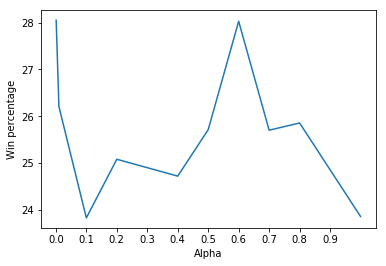

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alpha,wins)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel("Alpha")
plt.ylabel("Win percentage")
plt.show()

Since the number of steps is too high when alpha is 0, we are not able to find the difference for other values of alpha. So visualization after ignoring the case alpha=0

### Visualization of Epsilon Vs win Percentage

In [37]:
epsilon = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
wins_epsilon = []

env_epsilon = BlackjackEnv()
player1_epsilon = Player('player1')
env_epsilon.add_player(player1_epsilon)
agent_epsilon = Agent(env_epsilon)

for i in range(len(epsilon)):
    rtrace,trace = agent_epsilon.train(player1_epsilon, epsilon=epsilon[i])  
    rtrace_test, trace_test, win = agent_epsilon.test()
    
    wins_epsilon.append(win)
    print("Epsilon: "+str(epsilon[i])+"\tWin Percentage: "+str(win))

Epsilon: 0	Win Percentage: 27.869940278699403
Epsilon: 0.1	Win Percentage: 28.283485045513654
Epsilon: 0.2	Win Percentage: 26.70967741935484
Epsilon: 0.3	Win Percentage: 25.776965265082268
Epsilon: 0.4	Win Percentage: 23.396456933414782
Epsilon: 0.5	Win Percentage: 26.45631067961165
Epsilon: 0.6	Win Percentage: 22.760290556900728
Epsilon: 0.7	Win Percentage: 26.325411334552104
Epsilon: 0.8	Win Percentage: 26.514215080346105
Epsilon: 0.9	Win Percentage: 25.198291641244662
Epsilon: 1	Win Percentage: 26.870324189526183


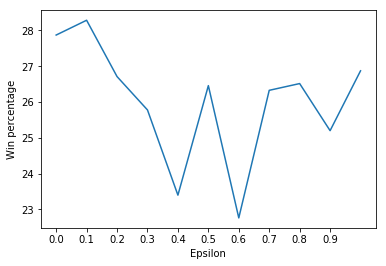

In [39]:
plt.plot(epsilon,wins_epsilon)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel("Epsilon")
plt.ylabel("Win percentage")
plt.show()

### Visualization of Gamma Vs Win Percentage

In [59]:
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
wins_gamma = []

env_gamma = BlackjackEnv()
player1_gamma = Player('player1')
env_gamma.add_player(player1_gamma)
agent_gamma = Agent(env_gamma)

for i in range(len(gamma)):
    rtrace,trace = agent_gamma.train(player1_gamma, gamma=gamma[i])  
    rtrace_test, trace_test, win = agent_gamma.test()
    
    wins_gamma.append(win)
    print("gamma: "+str(gamma[i])+"\tWin Percentage: "+str(win))

gamma: 0.1	Win Percentage: 28.688524590163933
gamma: 0.2	Win Percentage: 28.512679917751885
gamma: 0.3	Win Percentage: 29.415670650730412
gamma: 0.4	Win Percentage: 26.688741721854306
gamma: 0.5	Win Percentage: 26.526835286859964
gamma: 0.6	Win Percentage: 28.20676451818762
gamma: 0.7	Win Percentage: 24.248004910988335
gamma: 0.8	Win Percentage: 25.670731707317074
gamma: 0.9	Win Percentage: 23.674698795180724
gamma: 1	Win Percentage: 24.413710162357187


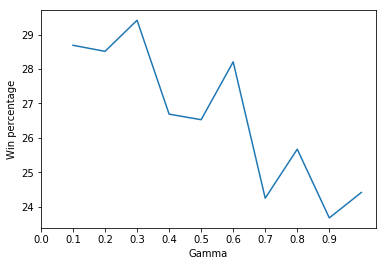

In [60]:
plt.plot(gamma,wins_gamma)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel("Gamma")
plt.ylabel("Win percentage")
plt.show()

### Visualization of No. of Games Vs Win Percentage

In [45]:
games = [100,500,800,1000,2000,3000,5000]
wins_games = []

env_games = BlackjackEnv()
player1_games = Player('player1')
env_games.add_player(player1_games)
agent_games = Agent(env_games)

for i in range(len(games)):
    rtrace,trace = agent_games.train(player1_games, maxiter=games[i])  
    rtrace_test, trace_test, win = agent_games.test()
    
    wins_games.append(win)
    print("games: "+str(games[i])+"\tWin Percentage: "+str(win))

games: 100	Win Percentage: 25.63749138525155
games: 500	Win Percentage: 30.420280186791196
games: 800	Win Percentage: 25.984251968503937
games: 1000	Win Percentage: 28.89463477698772
games: 2000	Win Percentage: 27.366387636831938
games: 3000	Win Percentage: 26.99004975124378
games: 5000	Win Percentage: 27.696234843650288


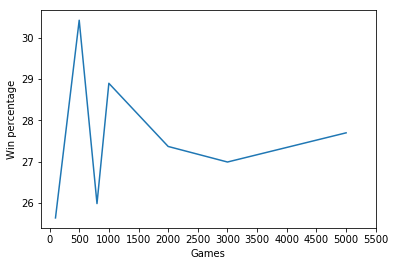

In [49]:
plt.plot(games,wins_games)
plt.xticks(np.arange(0, 6000, 500))
plt.xlabel("Games")
plt.ylabel("Win percentage")
plt.show()

### Visualization of No. of Rounds Vs Win Percentage

In [61]:
rounds = [100,300,500,800,1000,2000,3000]
wins_rounds = []

env_rounds = BlackjackEnv()
player1_rounds = Player('player1')
env_rounds.add_player(player1_rounds)
agent_rounds = Agent(env_rounds)

for i in range(len(rounds)):
    rtrace,trace = agent_rounds.train(player1_rounds, maxiter=rounds[i])  
    rtrace_test, trace_test, win = agent_rounds.test()
    
    wins_rounds.append(win)
    print("rounds: "+str(rounds[i])+"\tWin Percentage: "+str(win))

rounds: 100	Win Percentage: 26.436781609195403
rounds: 300	Win Percentage: 28.60927152317881
rounds: 500	Win Percentage: 28.505897771952817
rounds: 800	Win Percentage: 27.207792207792206
rounds: 1000	Win Percentage: 26.73139158576052
rounds: 2000	Win Percentage: 26.365348399246706
rounds: 3000	Win Percentage: 24.353312302839118


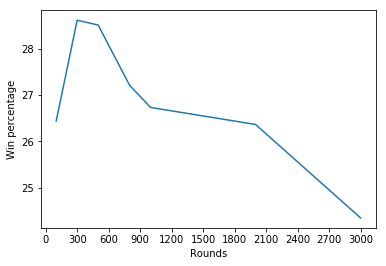

In [62]:
plt.plot(rounds,wins_rounds)
plt.xticks(np.arange(0, 3100, 300))
plt.xlabel("Rounds")
plt.ylabel("Win percentage")
plt.show()

## Report for Selected parameters

### Best value of Hyperparameters from the above experiments

<table style="width:50%">
    <h4 align='center'>Results</h4>
  <tr>
    <th>Hyperparameters</th>
    <th>Value</th> 
    <th>Best win Percentage</th>
  </tr>
  <tr>
    <td>Learning Rate, $\alpha$</td> 
    <td>0.01</td>
    <td>28.0546</td>
  </tr>
   <tr>
    <td>Epsilon, $\epsilon$</td> 
    <td>0.1</td>
    <td>28.2834</td> 
  </tr>
   <tr>
    <td>Discount Factor, $\gamma$</td> 
    <td>0.3</td>
    <td>29.4156</td>
  </tr>
    <tr>
    <td>Maxiter (Number of Games)</td> 
    <td>500</td>
    <td>30.4202</td> 
  </tr>
   <tr>
    <td>Maxstep (Number of Rounds)</td> 
    <td>300</td>
    <td>28.6092</td>
  </tr>
</table>

I run all the experiments on all the hyperparameters with different possible values they can take over a certain range by setting all other parameters to the default. In all the experiments that I run above, I am calculating win percentage based on the rewards calculated during the testing. I have taken into the consideration the cases where the Win percentage is maximum in all the hyperparameter experiments.  

### Hyperparameter tuning with Parameter Grid(Try out all possible values from given values ) 

In [66]:
from sklearn.model_selection import ParameterGrid

params_grid = { 'alpha' : [0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,1], 'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'epsilon' : [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]} 
grid_list = list(ParameterGrid(params_grid))


env_grid = BlackjackEnv()
player1grid = Player('player1')
env_grid.add_player(player1grid)
agent_grid = Agent(env_grid)
#initialise win array to store win results
win_grid = []
for k in range(len(grid_list)):
    rtrace,trace = agent_grid.train(player1grid,**grid_list[k])
    rtrace_test, trace_test, win = agent_grid.test()
    win_grid.append(win)

    if k == 0:
        best_win = win_grid[k]
        best_grid = grid_list[k]
    elif win_grid[k] > best_win:
        best_win = win_grid[k]
        best_grid = grid_list[k]


print("Best Win : ", best_win,"%")
print("Best Parameters : ", best_grid)

Best Win :  36.347673397717294 %
Best Parameters :  {'alpha': 1, 'epsilon': 0.5, 'gamma': 1}


After experimenting on each of the hyperparameters separately by keeping all other constant, I have trained and tested with all possible combinations from different possible values of all the hyperparameters.  
For generating all possible combination of hyperparameters, I have used ParameterGrid class from scikit-learn library whcih will generate all possible combinations in the form of dictionary.  

<table style="width:50%">
    <h3 align='center'>Results from all the combinations</h3>
    <h5 align='center'>Best Winning percentage out of all the combinations: 36.34 %</h5>
  <tr>
    <th>Hyperparameters</th>
    <th>Value</th> 
  </tr>
  <tr>
    <td>Learning Rate, $\alpha$</td> 
    <td>1</td>
  </tr>
   <tr>
    <td>Epsilon, $\epsilon$</td> 
    <td>0.5</td>
  </tr>
   <tr>
    <td>Discount Factor, $\gamma$</td> 
    <td>1</td>
  </tr>
</table>



# More Output plots for BlackJack

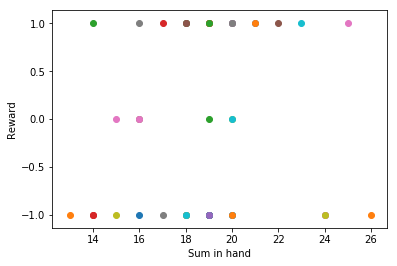

In [64]:
#Sample visualization: Rewards for various sum in hand
plt.xlabel("Sum in hand")
plt.ylabel("Reward")
for i in range(50):
    plt.scatter(trace_test[i][0], rtrace_test[i])


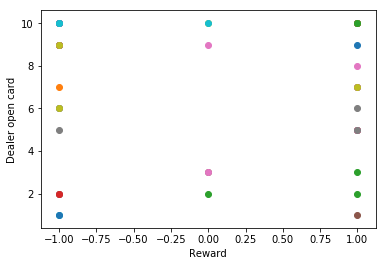

In [65]:
plt.xlabel("Reward")
plt.ylabel("Dealer open card")
for i in range(50):
    plt.scatter( rtrace_test[i], trace_test[i][1])


# Reading and analysis of learning results and plots

I did the anlaysis above for all the 5 hyperparameters for many different values one by one by keeping all other parameters to  their default values. below are the Reading and analysis:
1. **Learning Rate(alpha): **  
2. **Discount Factor(gamma): ** 
3. **Epsilon:**
4. **Number of games(maxiter):**
5. **Number of rounds(maxsteps):**

For the learning rate, Discount Factor and Epsilon, I have tried for number of values ranging between 0 to 1. But, there were not much difference or improvement in our winning percentage in either of our case. In all the cases, our  winning percentage remain close to 25% slightly up or down.  
Similar is the trends when I tried for the different values for maxiter and maxsteps ranging from 100 to 5000, our winning percenatage were close to 25% only.

So tuning just a single hyperparameter at a time does not yield good results. So tried tuning the model with trying all the combinations of all the  hyperparameters for different values.

**Parameter Grid**: For generating all possible combinations from all the hyperparameters, I used class ParameterGrid from scikit-learn. Tuning with all the combinations and get the best out of that all results in significantly good results. Our winning percentage of agent rose form 25% to 42%. 

# Conclusions

In this workbook, we get the basic understanding of reinforcement learning and how agent learn from past experience and use its previous experience for deciding next step. We learned 2 approaches of TD learning (SARSA and Q-learning) and chooses q-learining over SARSA approach.

Some of the challenges faced:
1. The formost challenge was to maintain the Q-table for storing best information for state and action.
2. Tuning to obtain the best hyperparameters for trainig the agent.
3. There were too many print statements in the sample run code. When I ran my experiments the size of notebook got increased rapidly and casuing it to crash. I had to struggle with restoring my noteboook and comment out the print statements.
4. The experiments took quite a long time to run due all possible combinations I was tried to run get best results.

Learning from the Exercise:
1. From this workbook, I get the basic intuition behind the reinforcement learning agent and how it works.
2. I got to know an interesting card game which I had never heard of. I will be definitely trying my luck with Blackjack when I visit a casino.
3. I understood how the hyperparameters are tuned and how the learning of an agent is controlled through hyperparameter tuning.

# References 

[1]  Steeve Huang. "Introduction to Various Reinforcement Learning Algorithms. Part I (Q-Learning, SARSA, DQN, DDPG)", Towards Data Science, Jan 12 2018,
https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-i-q-learning-sarsa-dqn-ddpg-72a5e0cb6287

[2] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science \& Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007),
https://matplotlib.org/tutorials/introductory/sample_plots.html

[3] Pranav Mahajan. "Playing Blackjack using Model-free Reinforcement Learning in Google Colab!", Towards Data Science, Jan 14 2019,
https://towardsdatascience.com/playing-blackjack-using-model-free-reinforcement-learning-in-google-colab-aa2041a2c13d

[4] "Q-learning”: From Wikipedia, the free encyclopedia, from 
https://en.wikipedia.org/wiki/Q-learning